## Part 3  Rider rentention

In [6]:
import pandas as pd 
import pandasql as pdspl
import json
from pandas.io.json import json_normalize
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

### 3.1 EDA 

In [7]:
df_file = json.load(open('ultimate_data_challenge.json'))
df = json_normalize(df_file)
display(df.head())
print('-'*53)
display(df.info())
print('-'*53)
display(df.describe())

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


None

-----------------------------------------------------


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


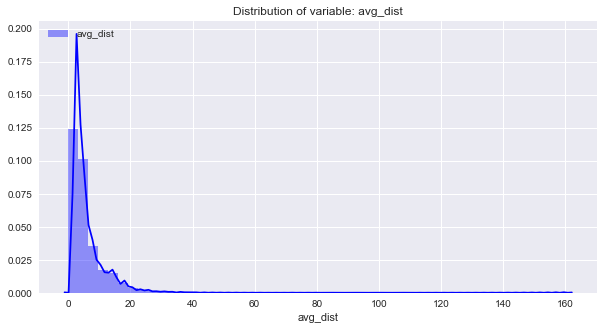

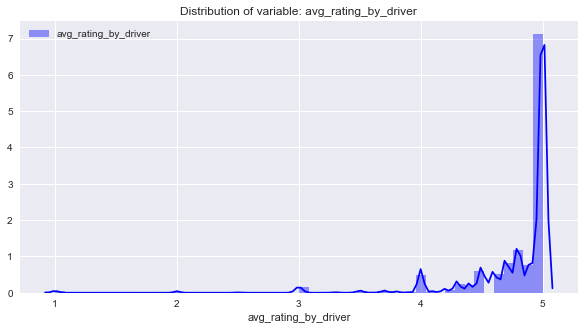

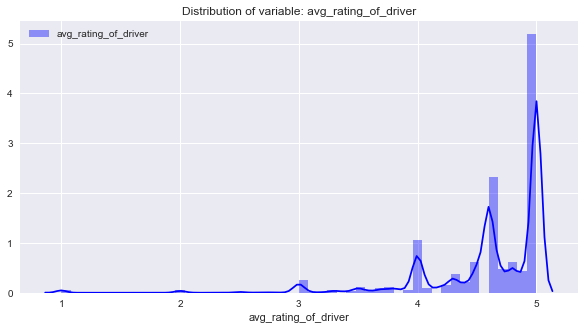

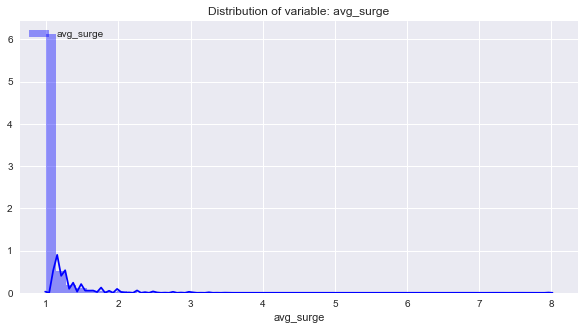

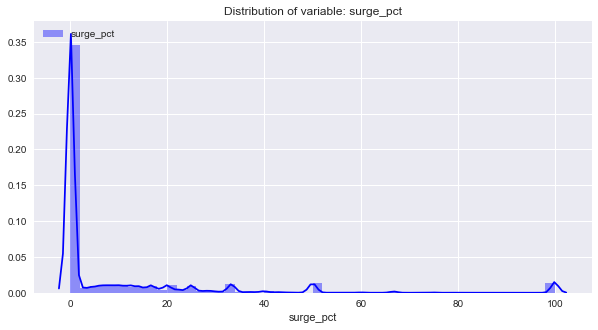

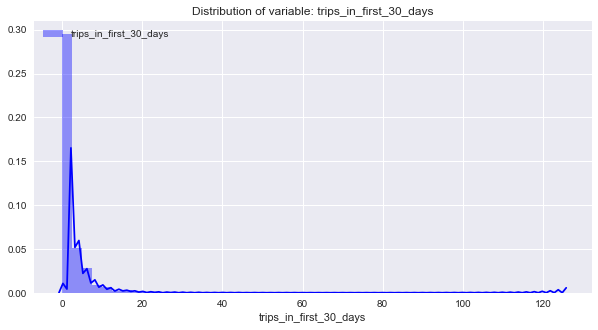

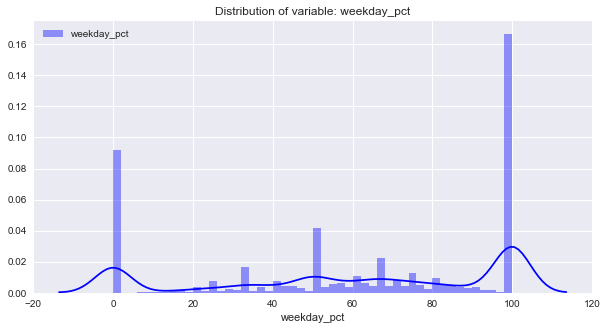

In [44]:
#distribution plots for all continuous variables
cols = ['avg_dist', 'avg_rating_by_driver','avg_rating_of_driver','avg_surge','surge_pct','trips_in_first_30_days','weekday_pct']
for col in cols:
    plt.rcParams['figure.figsize'] = [10, 5]
    sns.distplot(df[col].dropna(), bins = 50, norm_hist = True, color = 'blue', label = col)
    plt.legend(loc ='upper left')
    plt.title('Distribution of variable: '+ str(col))
    plt.show();

* 50000 users in total 
* There are null values regarding: avg_rating_by_driver, avg_rating_of_driver, which are reasonable because some people don't really give feedbacks. It might make sense that we just fill those null values with means.
* Null values for phone: it might be people are using non mainstream phones, or tablets, or computers? (we can just fill the nulls with the most frequently used devices, mode)
* Categorical data noted: city, phone, ultimate_black_user

Next, we are exploring city, phone, ultimate_back_user, and also convert the last_trip_date and signup_date to datetime for analysis.

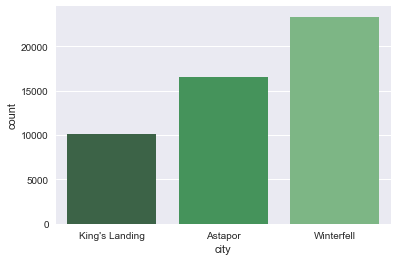

In [14]:
#categorical data
sns.countplot(x="city", data=df, palette="Greens_d")
plt.show()

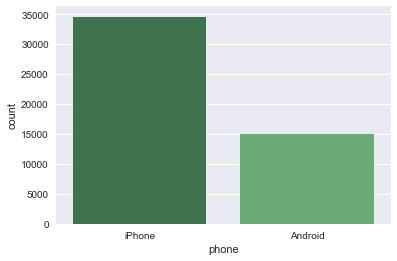

In [15]:
sns.countplot(x="phone", data=df, palette="Greens_d")
plt.show()

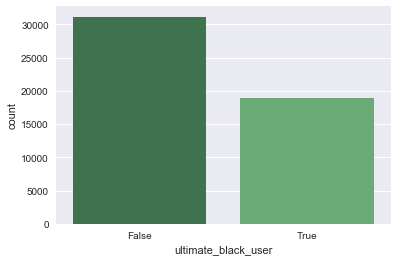

In [16]:
sns.countplot(x="ultimate_black_user", data=df, palette="Greens_d")
plt.show()

* For 'city': King's Landing vs. Astapor vs. Winterfell is approximately 1:1.6: 2.25
* For 'phone': iphone : Android is approximately 3.5 vs. 1.5, so we can impute the nulls in phone with the more frequent one: iphone 
* For 'ultimate_black_user': False : True is approximately 3:2.

In [33]:
#impute the missing values for avg_rating_by_driver and avg_rating_of_driver with medians
#fill the missing values of 'phone' with iphone 
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)
df.info() #check again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
retained                  50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 4.6+ MB


In [13]:
df['last_trip_date'] = pd.to_datetime(df.last_trip_date)
display(df.last_trip_date.describe())
print('-'*53)
df['signup_date'] = pd.to_datetime(df.signup_date)
display(df.signup_date.describe())

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

-----------------------------------------------------


count                   50000
unique                     31
top       2014-01-18 00:00:00
freq                     2948
first     2014-01-01 00:00:00
last      2014-01-31 00:00:00
Name: signup_date, dtype: object

* confirmed: signup_dates are all within Jan of 2014
* last_trip_dat: varies from 2014-01-01 to 2014-07-01. Based on the problem statement, we define a user retained as active in June (6th month after signing up)

Let's add a column 'retained' with 1 indicating yes (active in June) and 0 indicating no.

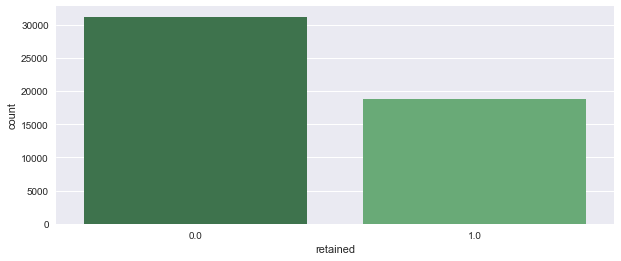

0.37608


In [38]:
df['retained'] = pd.Series(np.where(df.last_trip_date >= pd.Timestamp('2014-06-01'), 1.0, .0))
#let's see the retain rate 
sns.countplot(x="retained", data=df, palette="Greens_d")
plt.show()
print(sum(df.retained)/len(df.retained))

So not-retained vs. retained is approximately 3:2, so relatively balanced. The retained fraction accounts for 37.6% of total.

### 3.2 Predictive modeling 

In [91]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score 
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

In [50]:
# drop the dates columns and create dummy variables for categorical 
X_df = df.drop(['signup_date', 'last_trip_date', 'retained'], axis=1)
X_df = pd.get_dummies(X_df, columns = ['city', 'phone','ultimate_black_user'], drop_first=True)
X_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,0,1,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,0,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,0,1,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,1,0,0


In [51]:
X = X_df.values
y = df.retained.values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 0)

[[5466  785]
 [1279 2470]]


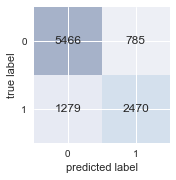

             precision    recall  f1-score   support

        0.0       0.81      0.87      0.84      6251
        1.0       0.76      0.66      0.71      3749

avg / total       0.79      0.79      0.79     10000

Tuned Model Parameters: {'gbc__n_estimators': 500, 'gbc__max_depth': 3, 'gbc__learning_rate': 0.1}


In [93]:
gbc= GradientBoostingClassifier(random_state=0)

#build a pipeline 
steps = [('scaler', StandardScaler()),
        ('gbc', gbc)]

pipeline = Pipeline(steps)

#search space 
parameters = {"gbc__n_estimators": [100, 200, 300, 500],
              "gbc__learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2, 1],
              "gbc__max_depth": [1,3,5,10]}

#randomized search hyperparameters with cross validation 
cv = RandomizedSearchCV(pipeline, parameters, cv=3, n_jobs=-1)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
fig, ax = plot_confusion_matrix(cm)
plt.show() 

print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

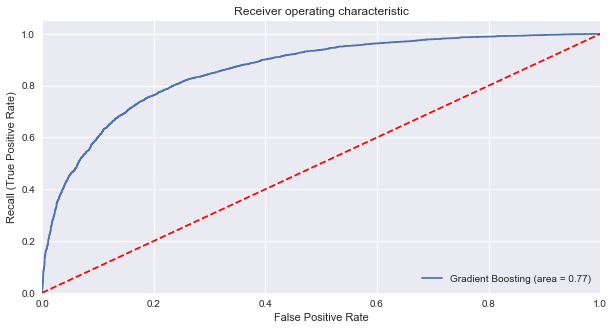

In [125]:
# plot the AUC curve 
test_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, cv.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % test_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall (True Positive Rate)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show();

Feature ranking:
1. feature 0 (0.235291)
2. feature 6 (0.177052)
3. feature 5 (0.135904)
4. feature 4 (0.123538)
5. feature 1 (0.085536)
6. feature 3 (0.076300)
7. feature 2 (0.073518)
8. feature 7 (0.031593)
9. feature 8 (0.022269)
10. feature 10 (0.019596)
11. feature 9 (0.019404)


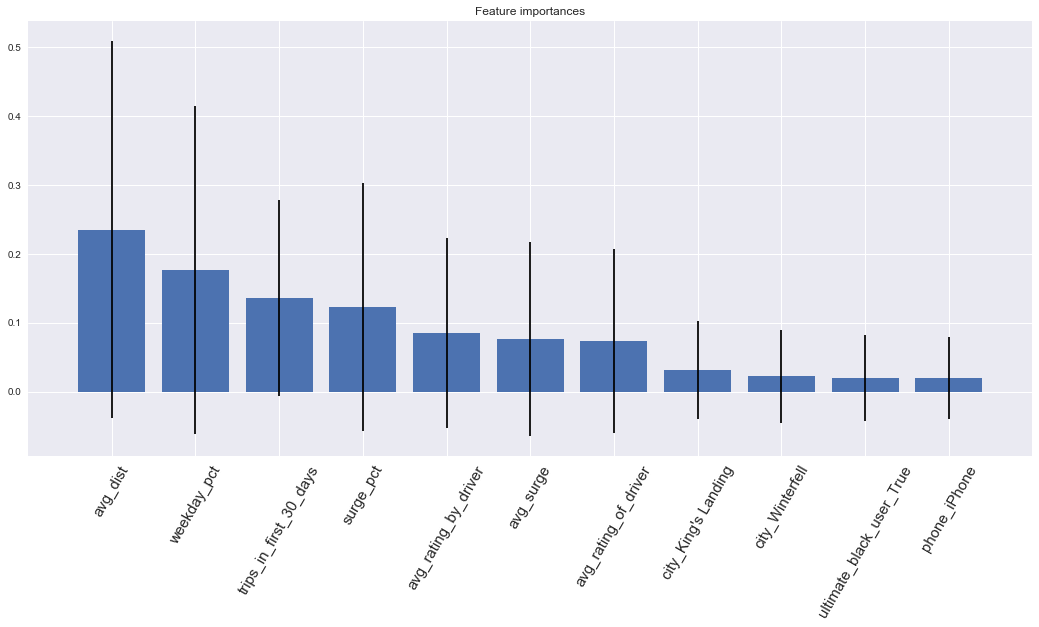

In [117]:
#Identify the important features
#retrieve the gradientboosting from RandomizedSearchCV object
gbc_cv = cv.best_estimator_.named_steps["gbc"]
importances = gbc_cv.feature_importances_
number_to_keep = len(importances)  
std = np.std([tree[0].feature_importances_ for tree in gbc_cv.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:number_to_keep]

print("Feature ranking:")
for f in range(len(indices)):
   print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize=(18,8))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(len(indices)), X_df.columns[indices], rotation=60, size=15)
plt.xlim([-1, len(indices)])
plt.show()

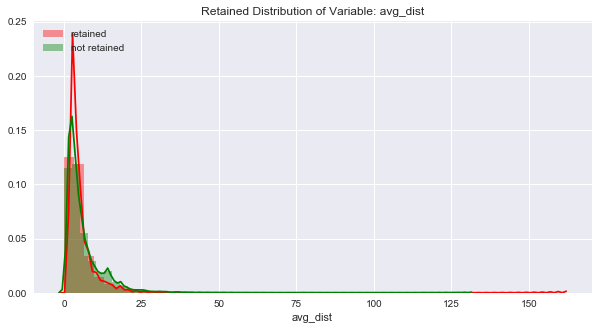

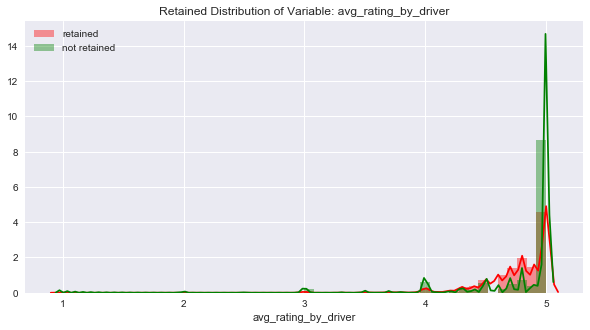

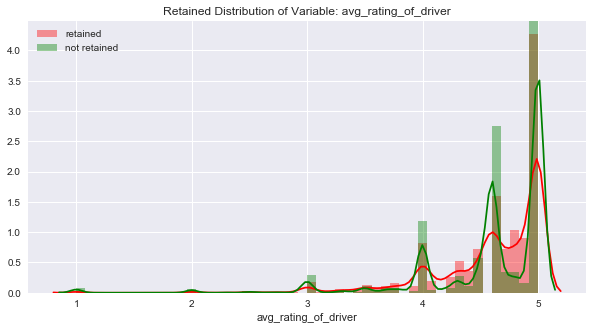

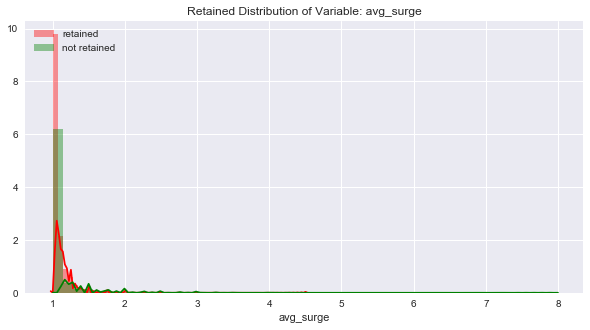

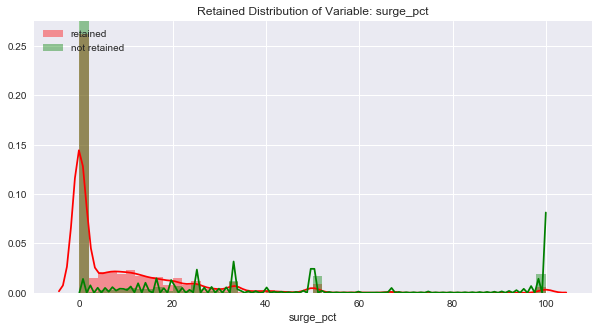

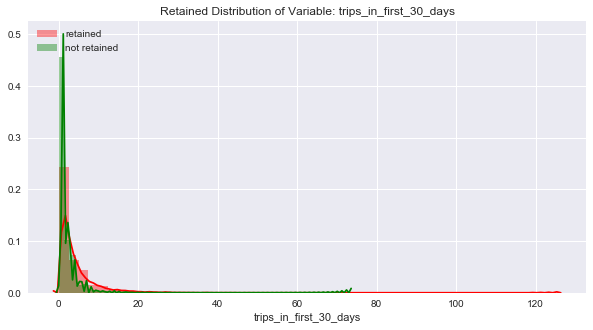

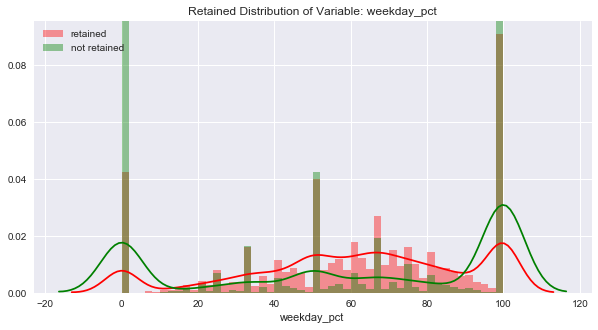

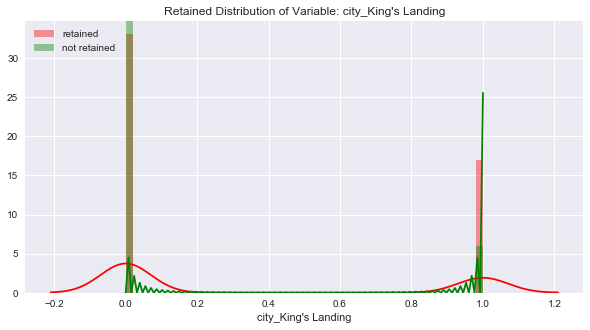

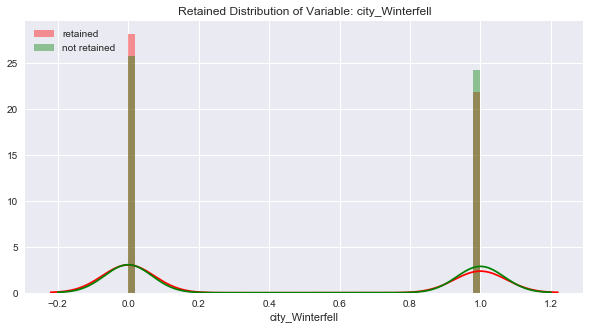

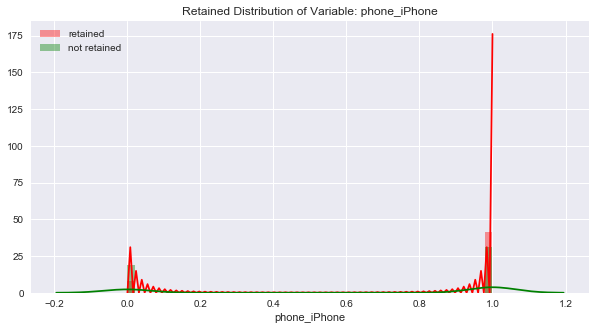

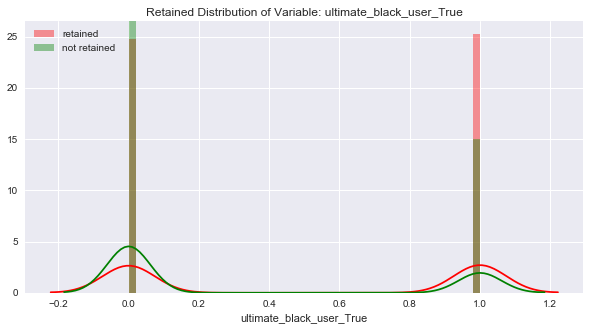

In [164]:
cols_full = X_df.columns
for col in cols_full:
    plt.rcParams['figure.figsize'] = [10, 5]
    sns.distplot(Xy_df[Xy_df.retained==1][col], bins = 50, norm_hist = True, color = 'red' ,label = 'retained')
    sns.distplot(Xy_df[Xy_df.retained==0][col], bins = 50, norm_hist = True, color = 'green', label = 'not retained')
    plt.legend(loc ='upper left')
    plt.title('Retained Distribution of Variable: '+ str(col))
    plt.show();

### Model Summary

* We choose GradientBoosting because it's a tree-based classifier, and therefore it's convinient to extract important features. Considering the business context of this problem, I think it's important to have the intepretations so as to decide where to put more efforts on. Take ANN models as a comparison: most of the time deep learning models do give better prediction results given sufficient data, neverthelesss they are still considered as magical black boxes due to intrinsic complexities within the models, and therefore we can't intepret how each variable counts in the prediction. 
* We use RandomizedSearchCV which combines hyperparameters tuning as well as cross validation on the data, and we have an average precision and recall of 0.79, and AUC of 0.77, which are all decent results.

### Discussion

The features ranked from the most important to the least from the 'feature importances' are:
* 1 avg_dist
* 2 weekday_pct
* 3 trips_in_first_30_days
* 4 surge_pct
* 5 avg_rating_by_driver
* 6 avg_surge
* 7 avg_rating_of_driver
* 8 city_King's Landing
* 9 city_Winterfell
* 10 ultimate_black_user_True
* 11 phone_iphone 

Therefore Ultimate might want to concentrate their efforts on the most important features, say top 3, in order to improve the rider retentions. Further supplementing information from the distribution plots of retained vs not-retained, we can see that for the top 3 features:
* avg_dist: retained users seem to have longer average distance per trip 30 days after signup, accordinly we can provide incentives like signup bonus for longer rides to encourage them to do so;
* trips_in_first_30_days: retained users generally have more trips taken in the first 30 days, similarly as the first one, we can also provide signup bonus to engage new users to take more trips after signups;
* weekday_pct: retained users tend to have higher weekday percentages, most likely they're using the rides for work/study. Accordingly we can do promotions like lowering some weekday rates.